In [2]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Без этой магической команды графики не отобразятся в ячейке Блокнота
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей


In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\IQ_countries.csv' )


In [4]:
df.drop(labels= [8], axis = 0, inplace=True)

In [5]:
#просмотр общей инфы
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     192 non-null    object 
 1   Country                  192 non-null    object 
 2   Average IQ               192 non-null    float64
 3   Continent                192 non-null    object 
 4   Literacy Rate            192 non-null    float64
 5   Nobel Prices             192 non-null    float64
 6   Human Development Index  178 non-null    float64
 7   Mean years of schooling  178 non-null    float64
 8   Gross National Income    178 non-null    float64
 9   Population               192 non-null    object 
dtypes: float64(6), object(4)
memory usage: 16.5+ KB


In [6]:
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_15412\3812666890.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
0,1,Japan,106.48,Asia,0.99,29.0,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4.0,0.745,5.1,732.0,10143543
2,3,Singapore,105.89,Asia,0.97,0.0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1.0,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8.0,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0.0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2.0,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2.0,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0.0,0.477,4.6,1622.0,8791092


In [7]:
#проверка на наличие пропущенных данных
df.isnull().sum()

Rank                       0
Country                    0
Average IQ                 0
Continent                  0
Literacy Rate              0
Nobel Prices               0
Human Development Index    0
Mean years of schooling    0
Gross National Income      0
Population                 0
dtype: int64

In [8]:
# Основные статистические показатели
df.describe()



,Average IQ,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,81.948854,0.863542,5.953125,0.724547,8.723958,18691.302083
std,13.299581,0.180465,32.052034,0.146787,3.231982,19988.798070
min,42.990000,0.190000,0.000000,0.385000,2.100000,732.000000
25%,74.250000,0.797500,0.000000,0.613000,5.600000,3677.250000
50%,82.180000,0.950000,0.000000,0.745000,9.000000,11610.000000
75%,91.352500,0.990000,1.250000,0.829500,11.400000,27625.000000
max,106.480000,1.000000,400.000000,0.962000,14.100000,90919.000000


In [9]:
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
0,1,Japan,106.48,Asia,0.99,29.0,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4.0,0.745,5.1,732.0,10143543
2,3,Singapore,105.89,Asia,0.97,0.0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1.0,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8.0,0.768,7.6,17504.0,1425671352


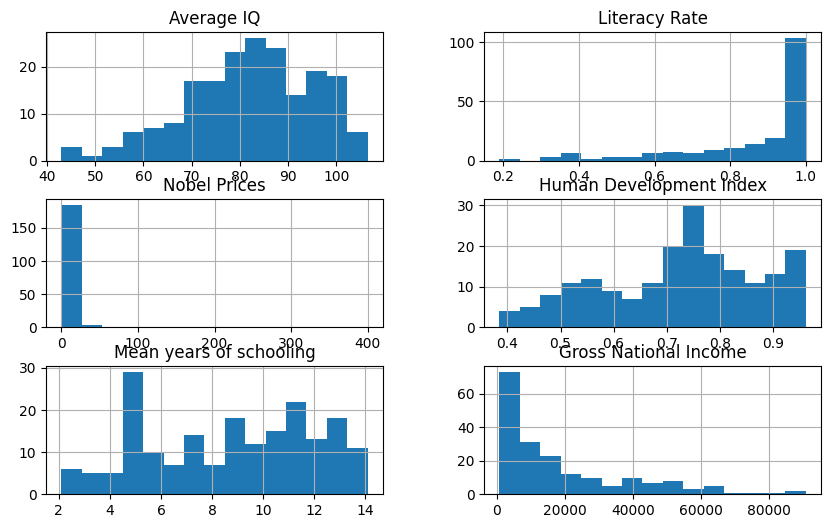

In [10]:
# Гистограмма 
df.hist(bins=15, figsize=(10, 6))
plt.show()

In [11]:
a = ['Rank', "Average IQ", "Literacy Rate",  "Nobel Prices",'Human Development Index','Mean years of schooling','Gross National Income','Population']

<Axes: >

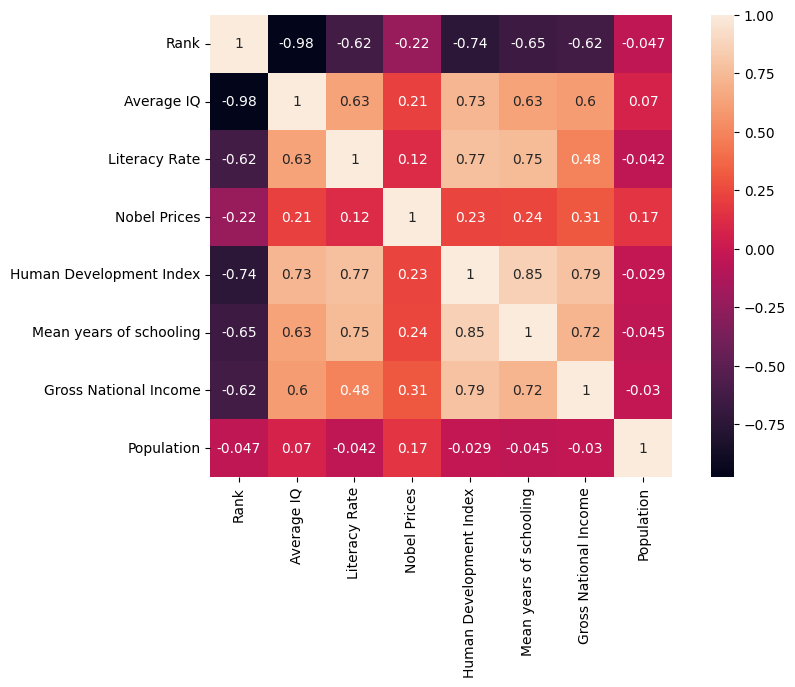

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df[a].corr(), square=True, annot=True)

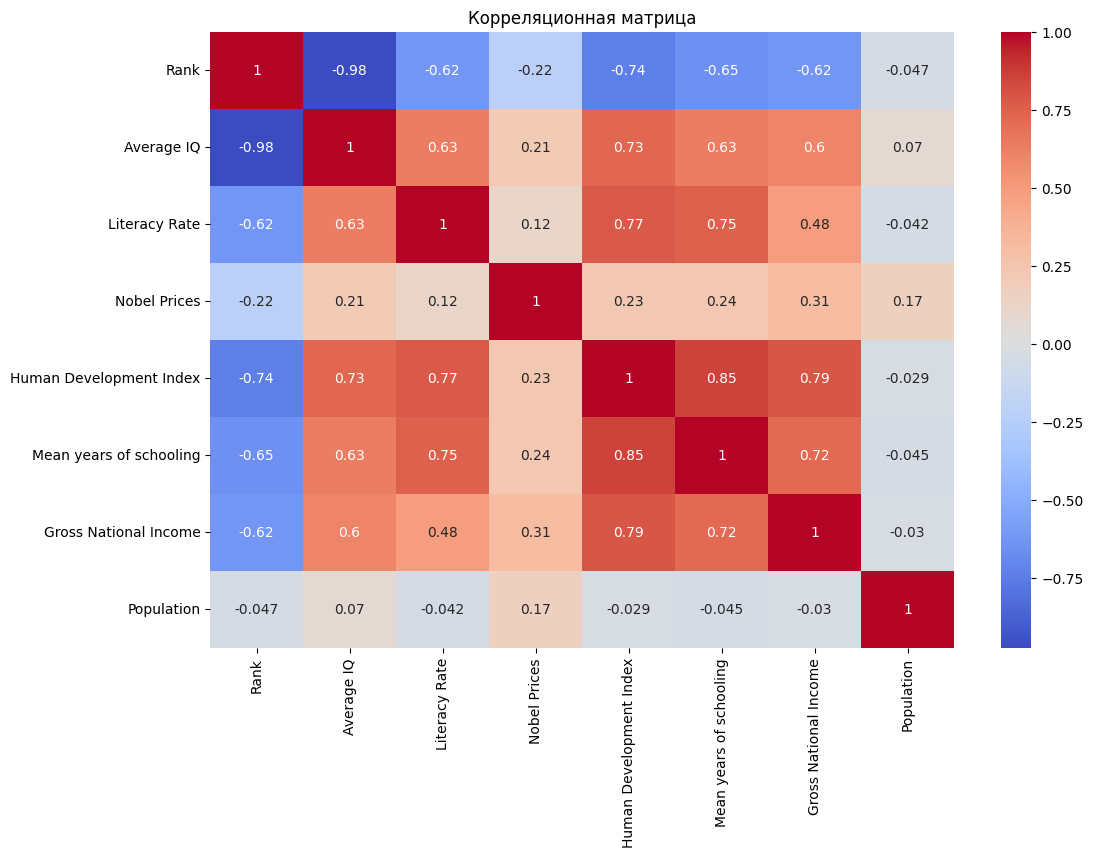

In [13]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(df[a].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [14]:
#приводит тип данных популяции в float
df['Population'] =df['Population'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     192 non-null    object 
 1   Country                  192 non-null    object 
 2   Average IQ               192 non-null    float64
 3   Continent                192 non-null    object 
 4   Literacy Rate            192 non-null    float64
 5   Nobel Prices             192 non-null    float64
 6   Human Development Index  192 non-null    float64
 7   Mean years of schooling  192 non-null    float64
 8   Gross National Income    192 non-null    float64
 9   Population               192 non-null    float64
dtypes: float64(7), object(3)
memory usage: 16.5+ KB


In [21]:
df_test = df.groupby('Continent').sum().sort_values('Population', ascending=False) 
df_test.head(8)

,Rank,Country,Average IQ,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
Continent,,,,,,,,,
Asia,1234561415214851525960616263646770727378808392...,JapanTaiwanSingaporeHong KongChinaSouth KoreaM...,4118.61,42.91,79.0,35.544,421.9,975975.0,4.645701e+09
Africa,7911011712012112213013113213513713914014114314...,MauritiusLibyaTunisiaChadSudanSeychellesSenega...,3565.45,34.92,26.0,29.570,299.8,264032.0,1.452917e+09
Europe,7810111213181920222425262729303132333536373839...,BelarusFinlandGermanyNetherlandsEstoniaLuxembo...,3790.03,39.52,573.0,35.192,487.5,1590933.0,5.946993e+08
North America,16284569,CanadaUnited StatesBermudaMexico,378.16,3.91,431.0,3.360,41.8,130201.0,5.072335e+08
South America,556871778693949596107128134,SurinameChileUruguayArgentinaParaguayBrazilGuy...,1005.40,11.40,11.0,9.058,114.9,178477.0,4.379674e+08
Europe/Asia,347684,RussiaTürkiyeGeorgia,267.59,2.96,2.0,2.462,34.2,72863.0,2.339888e+08
Central America,4966748285919799100102116119133142148152156171...,BarbadosCosta RicaBahamasTrinidad and TobagoTu...,1727.60,21.13,6.0,16.823,192.0,253618.0,9.375365e+07
Oceania,1723424387888990108127,AustraliaNew ZealandNew CaledoniaVanuatuFedera...,881.34,9.05,15.0,7.104,82.9,122631.0,4.199965e+07


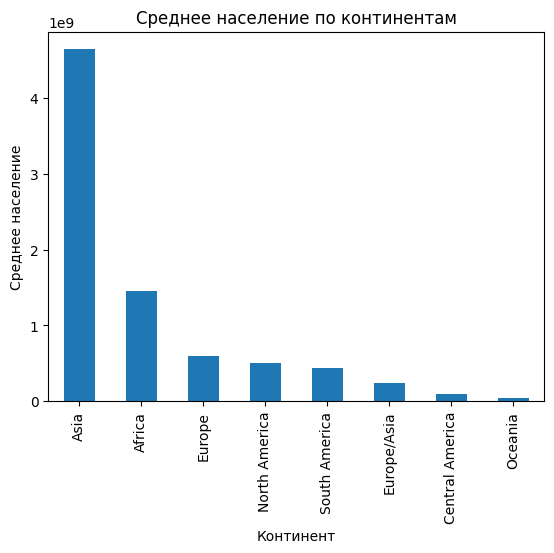

In [17]:
df_test['Population'].head(10).plot(kind='bar')

plt.title('Среднее население по континентам')
plt.xlabel('Континент')
plt.ylabel('Среднее население')
plt.show()

In [18]:
# Поиск аномалий с использованием IQR
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для аномалий
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация аномалий
anomalies = df[(df['Population'] < lower_bound) | (df['Population'] > upper_bound)]
print(anomalies)


    Rank         Country  Average IQ      Continent  Literacy Rate  \
0      1           Japan      106.48           Asia           0.99   
4      5           China      104.10           Asia           0.96   
9     10         Germany      100.74         Europe           0.99   
27    28   United States       97.43  North America           0.99   
33    34          Russia       96.29    Europe/Asia           1.00   
58    59         Vietnam       89.53           Asia           0.95   
68    69          Mexico       87.73  North America           0.95   
75    76         Türkiye       86.80    Europe/Asia           0.96   
92    93          Brazil       83.38  South America           0.93   
105  106     Philippines       81.64           Asia           0.97   
113  114            Iran       80.01           Asia           0.87   
114  115        Pakistan       80.00           Asia           0.56   
125  126       Indonesia       78.49           Asia           0.95   
136  137           E

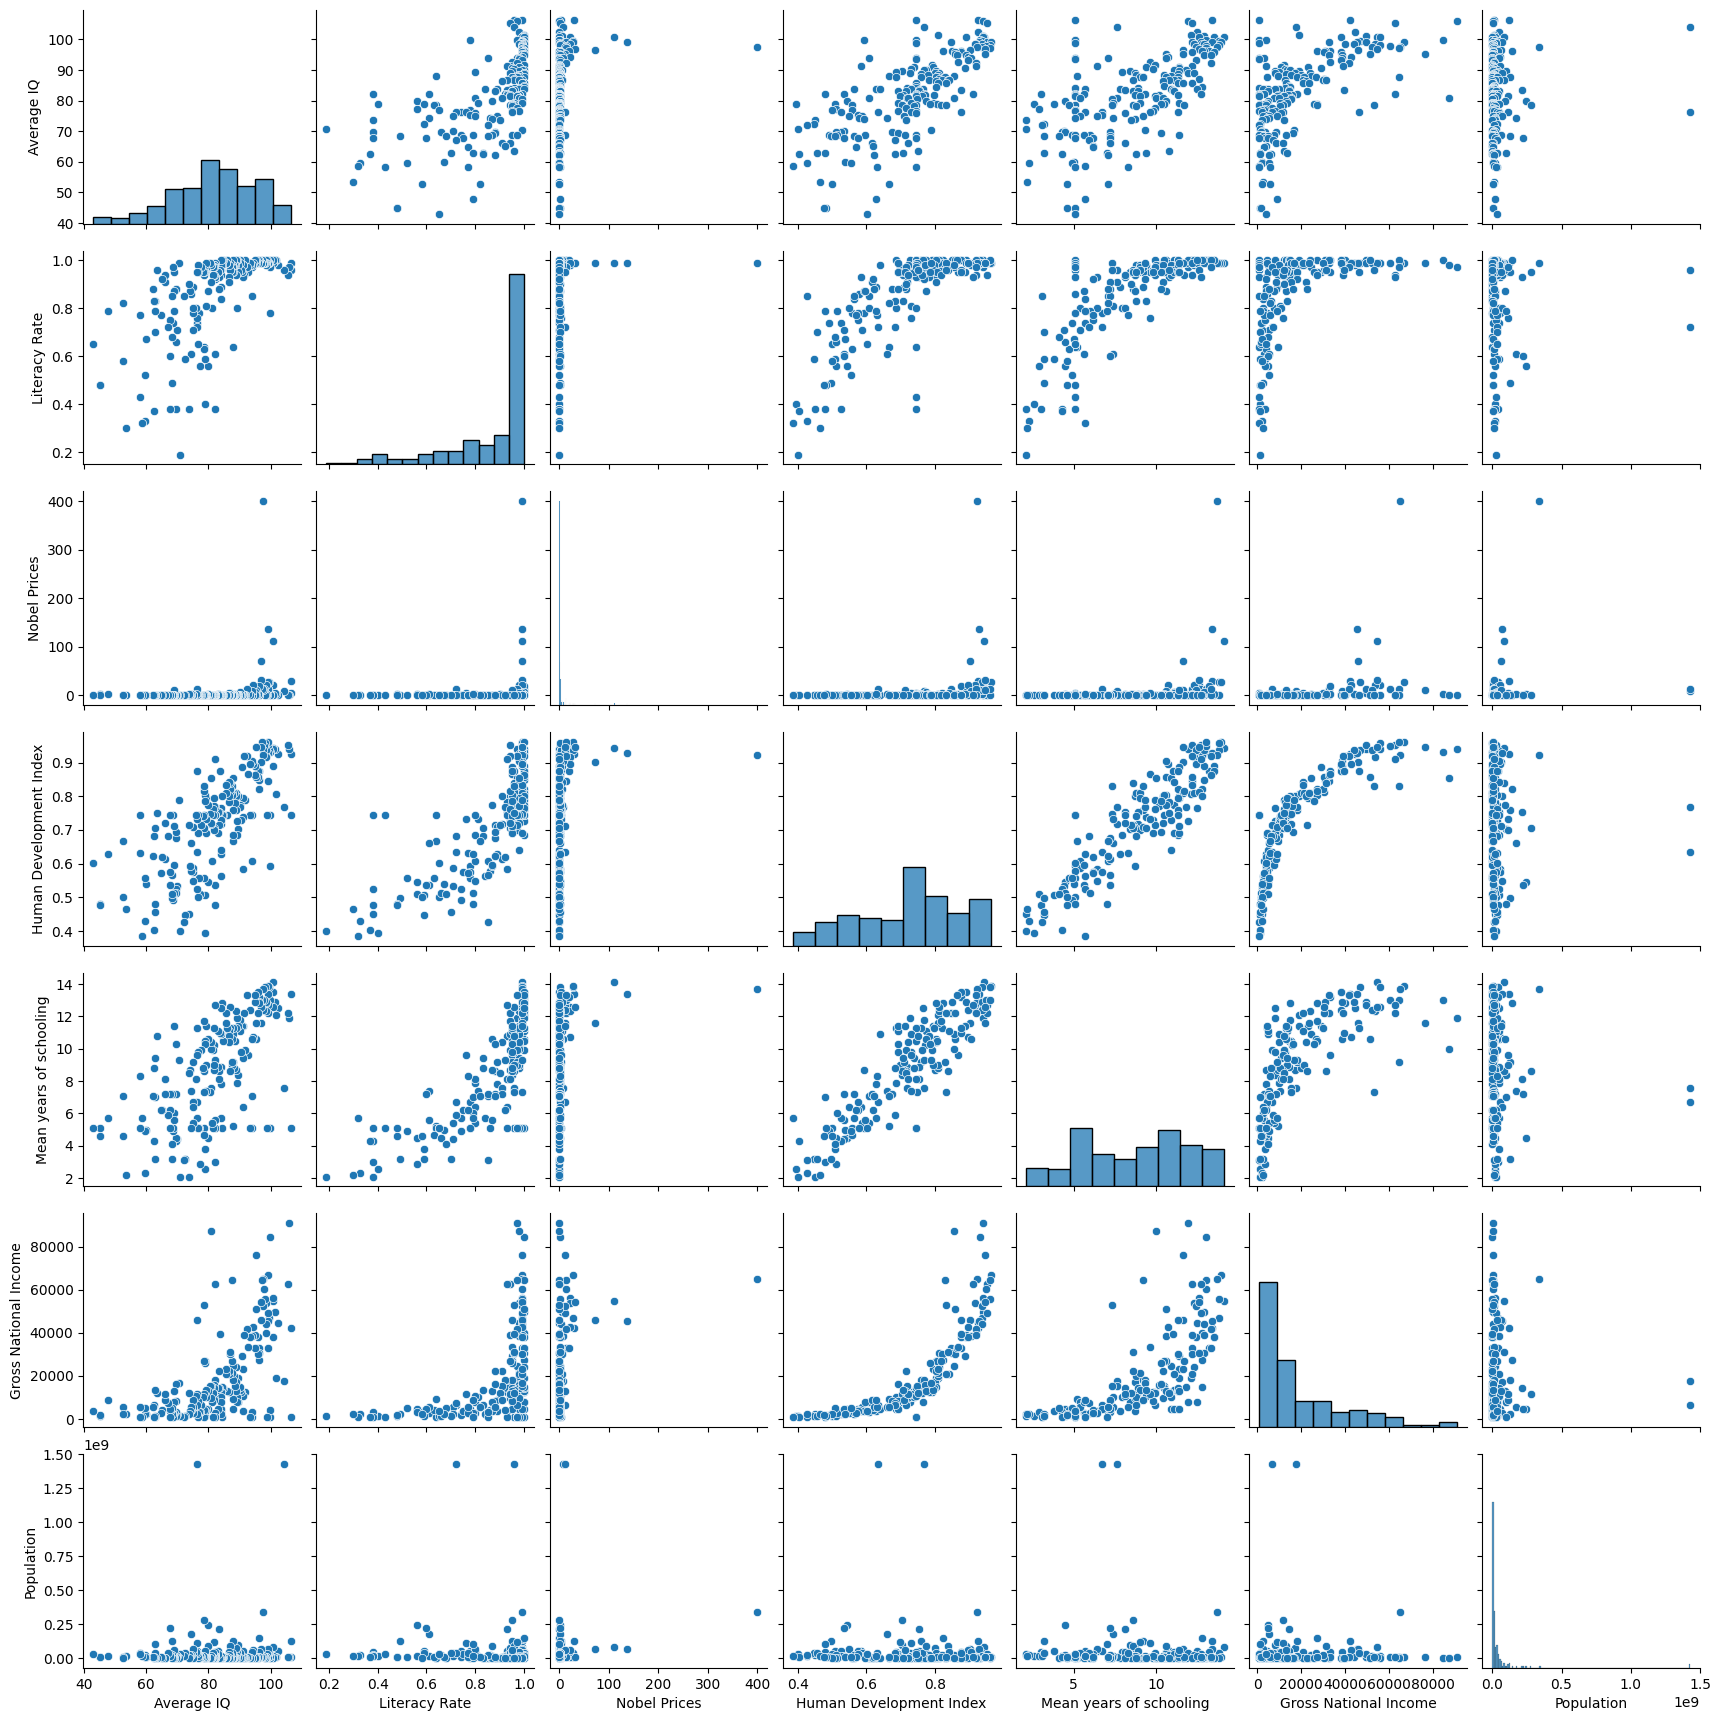

In [20]:
sns.pairplot(df)
plt.show()